# Задание 1

Для каждой задачи надо получить ответ на вопрос через pandas и визуализировать его любым подходящим способом (у всех графиков должна быть легенда, подписаны оси). Надо найти:  
1)долю всех задержек ко всем вылетам  
2)зависимость количества задержек от длины пути, который предстоит пролететь самолёту  
3)топ 5 направлений, для которых чаще всего происходят задержки  
4)в какие времена года чаще всего происходят задержки рейсов  
5)топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы  
6)топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки  
7)необычную зависимость количества задержек от имеющихся данных

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('flight_delays.csv')

In [7]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


**1) доля задержек**

19.044 % - доля задержанных рейсов


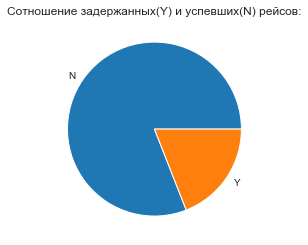

In [85]:
group = df.groupby('dep_delayed_15min')
plt.pie(group['Month'].count(), labels = df['dep_delayed_15min'].unique())
plt.title('Сотношение задержанных(Y) и успевших(N) рейсов:')
print(group['Month'].count().Y/(group['Month'].count().Y+group['Month'].count().N)*100, '% - доля задержанных рейсов')

In [31]:
group['Month'].count().shape

(2,)

**2) Задержки от пути**

In [79]:
group = df[df.dep_delayed_15min=='Y'].groupby('Distance')
dft = group.size().to_frame()
dft = pd.DataFrame({'Dist': dft.index, 'num_delay': dft.values.reshape(-1, 1).ravel()})
dft.head()

,Dist,num_delay
0,30,1
1,31,4
2,36,8
3,41,1
4,47,5


Text(0.5, 1.0, 'Зависимость задержек от пути:')

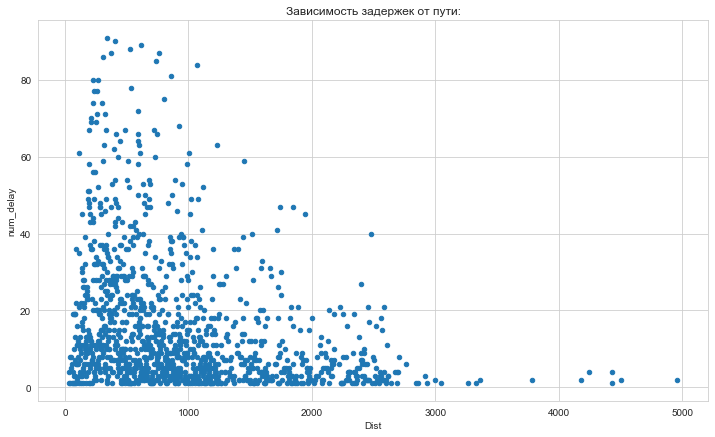

In [87]:
dft.plot.scatter(x='Dist', y='num_delay', figsize=(12,7))
plt.title('Зависимость задержек от пути:')

Видим, что сильнее всего задерживаются рейсы на более короткие расстояния. Проверим: может, их просто больше?

Text(0.5, 1.0, 'Количество рейсов от пути:')

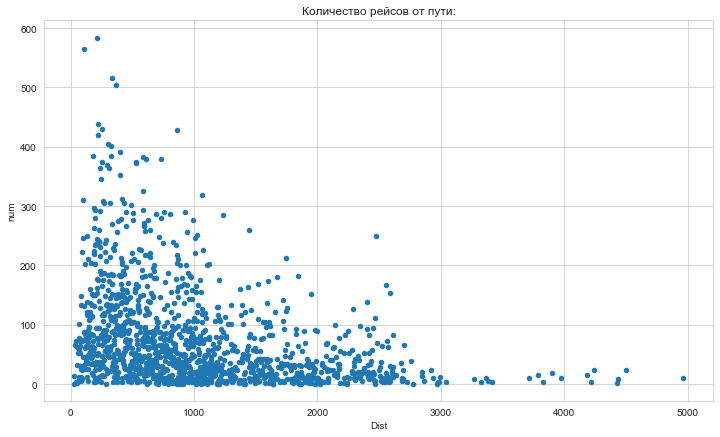

In [90]:
group = df.groupby('Distance')
dft1 = group.size().to_frame()
dft1 = pd.DataFrame({'Dist': dft1.index, 'num': dft1.values.reshape(-1, 1).ravel()})
dft1.plot.scatter(x='Dist', y='num', figsize=(12,7))
plt.title('Количество рейсов от пути:')

Да, так и есть: коротких рейсов больше. Проверим зависимость доли опозданий.

Text(0.5, 1.0, 'Доля задержек от пути:')

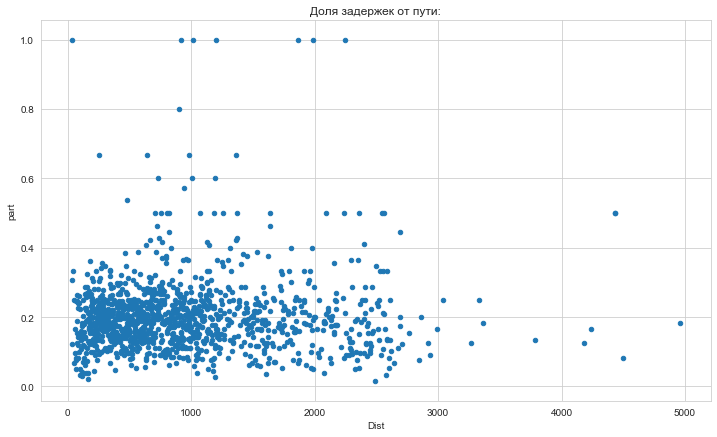

In [114]:
part = df[df.dep_delayed_15min=='Y'].groupby('Distance').size()/df.groupby('Distance').size()
part = part.dropna() #тут остались только те, кто изначально был в dft(то есть с задержкой)
dft['part'] = dft['Dist'].map(part) #вставка по ключу Dist
dft.plot.scatter(x='Dist', y='part', figsize=(12,7))
plt.title('Доля задержек от пути:')

Ладно, тут всё ещё видим, что доля задержек на коротких рейсах тоже больше. Может, это связвно с тем, что к длинным готовятся лучше. Или внезапно возникшее промедление в полете на длинном просто успевают догнать на остатке пути. Ну и ещё остаются факторы типа много коротких рейсов из безответственных аэропортов и проч.